<a href="https://colab.research.google.com/github/mohnabil2020/machine_learning/blob/master/horse_or_human_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is a notebook to classify images between horses and humans**

---



---

My target is to increase the accuracy of classification as mush as possible and try to classify correctly external images 

***I used external images to train the model***

In [72]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-07-28 18:05:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   133MB/s    in 1.1s    

2020-07-28 18:05:31 (133 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [73]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-07-28 18:05:33--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  34.9MB/s    in 0.3s    

2020-07-28 18:05:33 (34.9 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [74]:
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from keras.preprocessing import image
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow import keras

In [75]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy')>.97):
                print("\nReached 97 % accuracy so cancelling training!")
                self.model.stop_training = True

In [76]:
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [77]:
# Directory with our training horse pictures for training
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures for training
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures for validation
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures for validation
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [78]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse30-3.png', 'horse15-0.png', 'horse01-3.png', 'horse14-4.png', 'horse19-5.png', 'horse43-3.png', 'horse28-7.png', 'horse40-8.png', 'horse32-7.png', 'horse30-9.png']
['human05-19.png', 'human05-09.png', 'human09-12.png', 'human17-10.png', 'human04-22.png', 'human15-19.png', 'human08-04.png', 'human16-25.png', 'human03-23.png', 'human01-08.png']
['horse5-002.png', 'horse4-599.png', 'horse5-402.png', 'horse4-000.png', 'horse2-218.png', 'horse3-026.png', 'horse3-440.png', 'horse4-202.png', 'horse6-345.png', 'horse3-584.png']
['valhuman05-13.png', 'valhuman02-02.png', 'valhuman01-02.png', 'valhuman01-10.png', 'valhuman01-21.png', 'valhuman05-15.png', 'valhuman05-19.png', 'valhuman04-06.png', 'valhuman02-11.png', 'valhuman05-08.png']


In [79]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


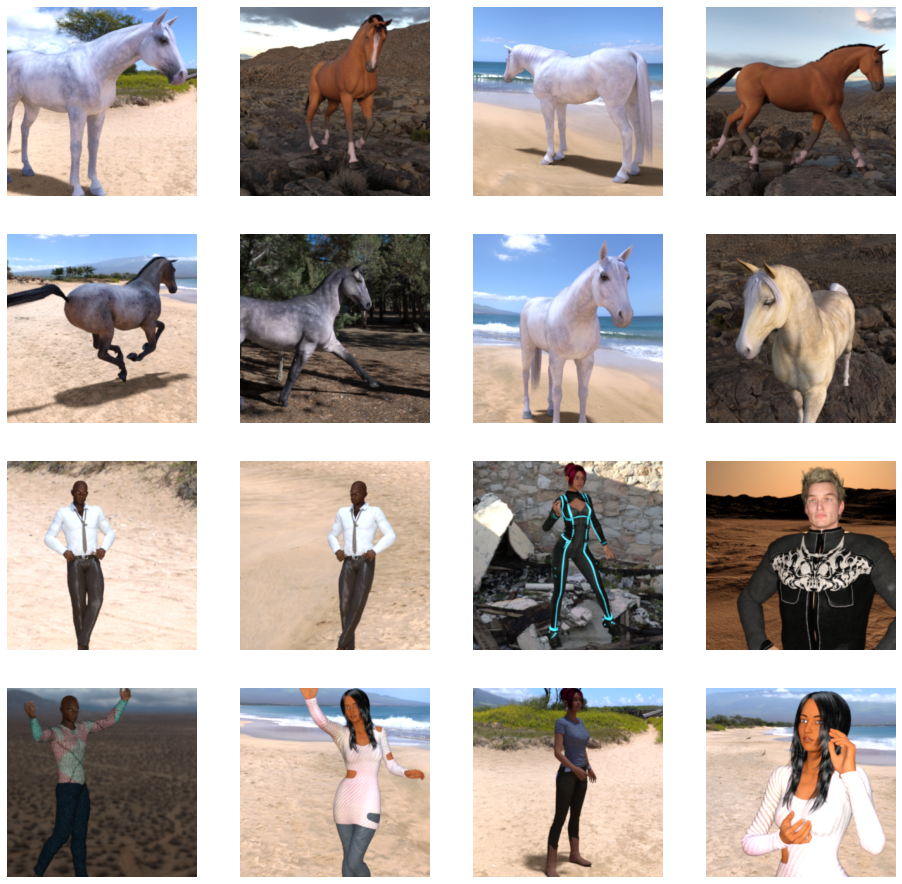

In [80]:
nrows = 4
ncols = 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [81]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [82]:
callbacks = myCallback()

In [83]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 33, 33, 64)       

In [84]:
model.compile(
                loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [85]:
history=model.fit(
                    train_generator,  
                    validation_data = validation_generator,
                    epochs=15,
                    callbacks=[callbacks]
                  )
                    


Epoch 1/15
9/9 [==============================] - 8s 860ms/step - loss: 0.6687 - accuracy: 0.5677 - val_loss: 0.6436 - val_accuracy: 0.5312
Epoch 2/15
9/9 [==============================] - 7s 750ms/step - loss: 0.5425 - accuracy: 0.7322 - val_loss: 0.3952 - val_accuracy: 0.8398
Epoch 3/15
9/9 [==============================] - 8s 849ms/step - loss: 0.3043 - accuracy: 0.8724 - val_loss: 1.2215 - val_accuracy: 0.8320
Epoch 4/15
9/9 [==============================] - 7s 748ms/step - loss: 0.2133 - accuracy: 0.9172 - val_loss: 0.8433 - val_accuracy: 0.8398
Epoch 5/15
9/9 [==============================] - 7s 753ms/step - loss: 0.1994 - accuracy: 0.9143 - val_loss: 1.1286 - val_accuracy: 0.8203
Epoch 6/15
9/9 [==============================] - 7s 744ms/step - loss: 0.1671 - accuracy: 0.9338 - val_loss: 1.3721 - val_accuracy: 0.8281
Epoch 7/15
9/9 [==============================] - 8s 847ms/step - loss: 0.0978 - accuracy: 0.9659 - val_loss: 1.3956 - val_accuracy: 0.8320
Epoch 8/15
9/9 [====

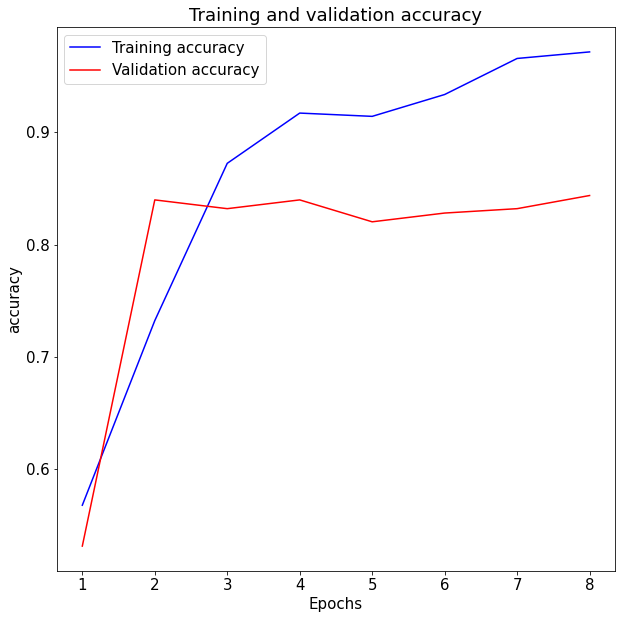

In [86]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1 , len(acc) + 1)

plt.plot(epochs , acc , 'b' , label = 'Training accuracy' )
plt.plot(epochs , val_acc, 'r' , label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

plt.legend()
plt.rc('font', size = 15)
plt.rc('figure', figsize=[10,10])
plt.show()


**This part to upload external image from your computer and test the model :**

***hint :*** ( try to use image > 300*300 pixels because this is the minimum pixels for the model ) 

---



---



In [92]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving beautiful-1274056_640.jpg to beautiful-1274056_640.jpg
[1.]
beautiful-1274056_640.jpg is a human


**Visualizing the Convolutions and Pooling  layers :**

---

---



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


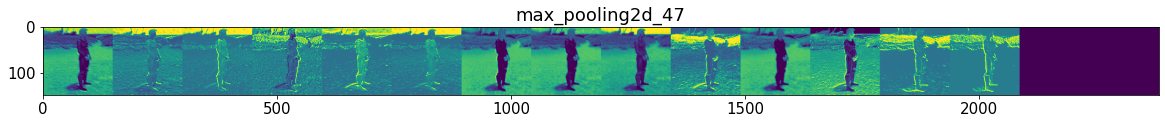

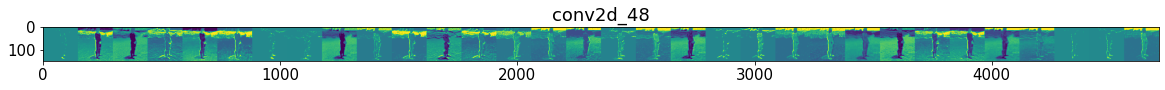

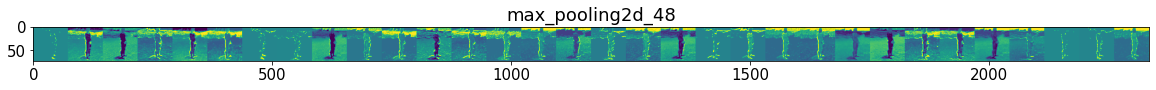

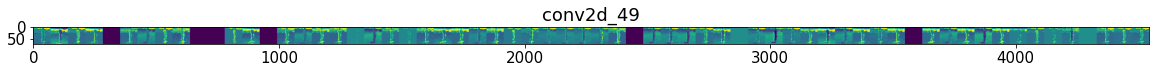

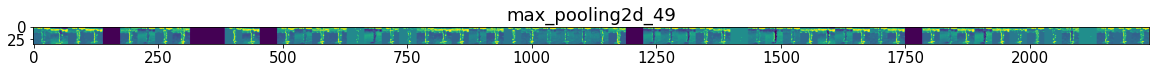

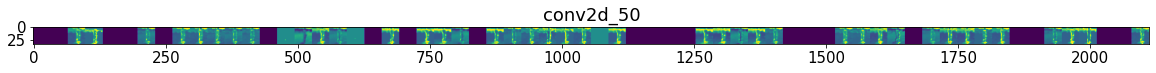

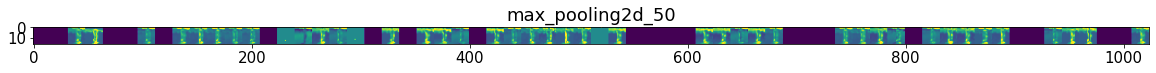

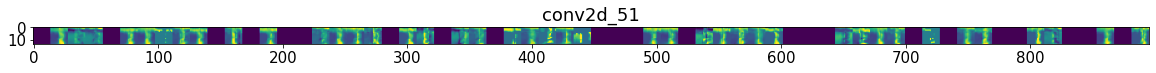

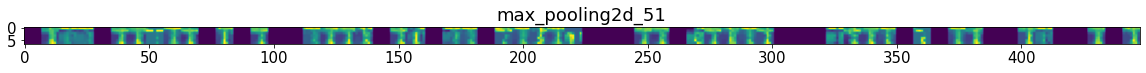

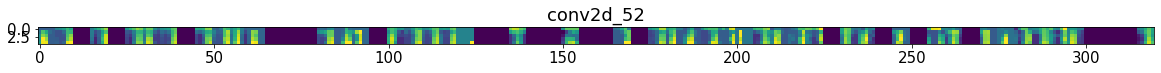

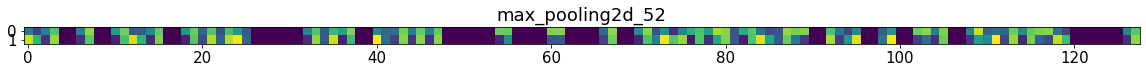

In [91]:

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')